Dados da Família Helium

##!pip install pandas as matplotlib no terminal python ou cmd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# convertendo os dados em um DataFrame do pandas

In [2]:
data = [
    {"Data": "01/04/2024", "Descrição": "Salário Helen", "Categoria": "Renda", "Valor (R$)": 3000.00, "Tipo": "Receita", "Fonte dos Gastos": "Salário", "Status": "Paga"},
    {"Data": "05/04/2024", "Descrição": "Salário Sofia", "Categoria": "Renda", "Valor (R$)": 2500.00, "Tipo": "Receita", "Fonte dos Gastos": "Salário", "Status": "Paga"},
    {"Data": "10/04/2024", "Descrição": "Pensão de Sofia", "Categoria": "Renda", "Valor (R$)": 202.19, "Tipo": "Receita", "Fonte dos Gastos": "Dinheiro", "Status": "Paga"},

]


# convertendo os dados em um DataFrame do pandas

In [5]:
df = pd.DataFrame(data)

# convertendo a coluna 'Data' para o tipo datetime

In [6]:
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# agrupando os dados por mês

In [7]:
df['Mês'] = df['Data'].dt.to_period('M')

# calculando as receitas totais por mês

In [14]:
receitas_por_mes = df[df['Tipo'] == 'Receita'].groupby('Mês')['Valor (R$)'].sum()

# calculando os gastos totais por mês

In [8]:
gastos_por_mes = df[df['Tipo'] == 'Conta'].groupby('Mês')['Valor (R$)'].sum()

# calculando o saldo por mês (receitas - gastos)

In [15]:
saldo_por_mes = receitas_por_mes - gastos_por_mes

# gastos por categoria em abril de 2024

In [16]:
gastos_abril_2024 = df[df['Mês'] == '2024-04']
gastos_por_categoria = gastos_abril_2024.groupby('Categoria')['Valor (R$)'].sum()

# status dos pagamentos em abril de 2024

In [17]:
status_pagamentos = gastos_abril_2024.groupby('Status')['Descrição'].apply(list)

# imprimindo as informações

In [18]:
print("Receitas Totais por Mês:")
print(receitas_por_mes)
print("\nGastos Totais por Mês:")
print(gastos_por_mes)
print("\nSaldo por Mês (Receitas - Gastos):")
print(saldo_por_mes)
print("\nGastos por Categoria (Abril de 2024):")
print(gastos_por_categoria)
print("\nStatus dos Pagamentos (Abril de 2024):")
print(status_pagamentos)

Receitas Totais por Mês:
Mês
2024-04    5702.19
Freq: M, Name: Valor (R$), dtype: float64

Gastos Totais por Mês:
Series([], Freq: M, Name: Valor (R$), dtype: float64)

Saldo por Mês (Receitas - Gastos):
Mês
2024-04   NaN
Freq: M, Name: Valor (R$), dtype: float64

Gastos por Categoria (Abril de 2024):
Categoria
Renda    5702.19
Name: Valor (R$), dtype: float64

Status dos Pagamentos (Abril de 2024):
Status
Paga    [Salário Helen, Salário Sofia, Pensão de Sofia]
Name: Descrição, dtype: object


# plotando os resultados

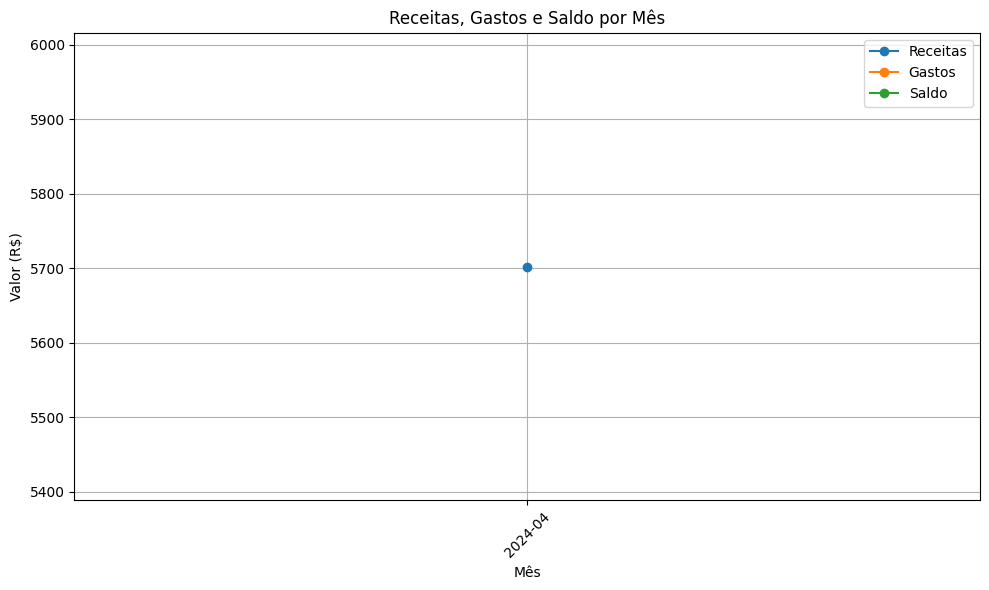

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(receitas_por_mes.index.astype(str), receitas_por_mes.values, label='Receitas', marker='o')
plt.plot(gastos_por_mes.index.astype(str), gastos_por_mes.values, label='Gastos', marker='o')
plt.plot(saldo_por_mes.index.astype(str), saldo_por_mes.values, label='Saldo', marker='o')

plt.title('Receitas, Gastos e Saldo por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
